# Исследование данных о продажах игр
Необходимо выявить определяющие успешность игры закономерности, на основе данных о продажах, оценках пользователей и экспертов, жанрах и платформах игр. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В проекте будет несколько блоков:
1. загрузка данных и изучение общей информации;
2. предобработка данных;
3. исследовательский анализ:
    - распределение количества игр по годам;
    - анализ игр по платформам;
    - влияние отзывов пользователей и критиков на продажи;
    - анализ игр по жанрам;
4. портрет пользователей разных регионов;
5. проверка гипотез:
    - гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - гипотеза 2: средние пользовательские рейтинги жанров Action и Sports разные;
6. общий вывод.

## Загрузка данных и изучение общей информации

Для начала работы импортируем все необходимые в прокте библиотеки:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Загрузим данные о продажах, оценках пользователей и экспертов, жанрах и платформах игр:

In [2]:
#Считываем данные о продажах, оценках пользователей и экспертов, жанрах и платформах игр и сохраняем в переменную data
data = pd.read_csv('/datasets/games.csv')
#Выводим первые 10 строк датафрейма
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрим информацию о датафрейме с помощью метода `info()`:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим на числовое описание данных:

In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Имеется датафрейм состоящий из 11 колонок и 16715 строк и видно, что:
- названия столбцов необходимо будет привется к нижнему регистру;
- в 6 столбцах есть пропуски, необходимо разобраться в причинах их появления и заполнить по возможности;
- типы данных не везде нужный, нужно будет заменить;
- числовые данные выглядят реальными, оценки критиков в нужных пределах.

## Предобработка данных

### Замена названий столбцов

Приведем названия столбцов к единооразию, сделав все символы строчными:

In [5]:
data.columns = data.columns.str.lower()

### Заполнение пропусков

Посмотрим, где сколько пропусков:

In [6]:
data.isna().sum() #находим количество пропущенных значений для каждого столбца

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропусков в оценках и рейтинге `critic_score`, `user_score` и `rating` так много, скорее всего потомучто это непопулярные  игры, созданные любителями, в которых просто не набралось данных об оценках, чтобы их выставить и заполнить пропуски в этих столбцах не получится, так как предположить значения этих ячеек не представляется возможным.

Данные с пропусками в `year_of_release`, `name` и `genre` заполнить также не получиться, и раз их не так много и они все равно не будут использоваться в дальнейшем анализе из-за отсутствия года просто удалим их:

In [7]:
# удаляем строки с пропусками в name, year_of_release и genre
data = data.dropna(subset=['name', 'year_of_release', 'genre'])
# посмотрим на количество пропущенных значений для каждого столбца после удаления
data.isna().sum() 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Строки с пропусками в `year_of_release`, `name` и `genre` удалены.

###  Замена типов данных

Посмотрим сначала, почему у столбца `user_score` тип `object`:

In [8]:
# посмотрим на уникальные значения user_score
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Нашлась причина, есть значение `tbd`, а `tbd` – это аббревиатура от английской фразы «To be determined», что в переводе означает «будет определено», то есть, когда игра имеет рейтинг `tbd`, это означает, что ее рейтинг еще не был определен официальными ресурсами или критиками.

Раз рейтинг не определен, заменим эти значения на пропуски, чтобы в дальнейшем можно было изменить тип столбца на `float`, и с ним можно было производить метаматические операции:

In [9]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.NaN

Категориальным переменным `name`, `genre` заменим тип на `category`, год релиза игр `year_of_release` это целочисленная переменная поэтому присвоим тип `Int64`, столбцу с оценками пользователей `user_score` присвоим тип `float`:

In [10]:
data[['name', 'genre']] = data[['name', 'genre']].astype('category')
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  category
 1   platform         16444 non-null  object  
 2   year_of_release  16444 non-null  Int64   
 3   genre            16444 non-null  category
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score     7983 non-null   float64 
 9   user_score       7463 non-null   float64 
 10  rating           9768 non-null   object  
dtypes: Int64(1), category(2), float64(6), object(2)
memory usage: 1.7+ MB


Замена типов данных прошла успешно.

Проверим данные в стобце `user_score` после замены типа данных:

In [11]:
data['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Видно что данные в допустимых пределах, нет некорректных значений.

### Проверка на наличие явных и неявных дубликатов

Проверим на наличие явных и неявных (совпадения по `name`, `platform` и `year_of_release` одновременно) дубликатов:

In [12]:
print('Количество явных дубликатов:', data.duplicated().sum())
print('Количество неявных дубликатов:', data[['name', 'platform', 'year_of_release']].duplicated().sum())

Количество явных дубликатов: 0
Количество неявных дубликатов: 1


Есть один неявный дубликат, посмотрим на него:

In [13]:
data.loc[data[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Видно, что это одна и та же игра, даже рейтинг один, удалим строку с индексом `16230`:

In [14]:
# удаляем неявный дубликат и сбрасываем индексы после всех удалений
data = data.drop(data.loc[data[['name', 'platform', 'year_of_release']].duplicated()].index).reset_index(drop=True)

После преобработки осталось 16443 коректных строки от исходного датафрейма.

### Добавление столбцов

Для дальнейшего анализа добавим стоблец `world_sales` с сумарными продажами во всех регионах:

In [15]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
# проверим не появилось ли пропуски в данных при сложении данных
print('Количество строк в world_sales:', len(data['world_sales']))
print('Количество пропусков в world_sales:', data['world_sales'].isna().sum())

Количество строк в world_sales: 16443
Количество пропусков в world_sales: 0


Добавление нового столбца прошло без ошибок, все строки заполнены без пропусков.

Вывод по блоку предобработка данных:
- названия столбцов были приведены в удобный вид;
- изменены типы данных;
- убраны строки с пропусками в `year_of release`, `name` и `genre`;
- убран один неявный дубликат;
- добавлен столбец с суммарными продажами по миру.

## Исследовательский анализ

### Распределение количества игр по годам

Посмотрим как выпускались игры по годам, для этого применим к столбцу `year_of_release` метод `describe` и построим график "ящик с усам":

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

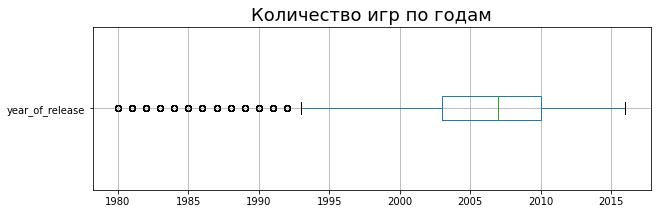

In [16]:
# числовое описание данных
display(data['year_of_release'].describe())
# построим график "ящик с усами" по столбцу year_of_release
data.boxplot(
    column='year_of_release',
    vert=0,
    figsize=(10,3)
)
plt.title("Количество игр по годам", fontsize=18)
plt.show()

Теперь посмотрим на график изменения количества игр в зависимости от года релиза:

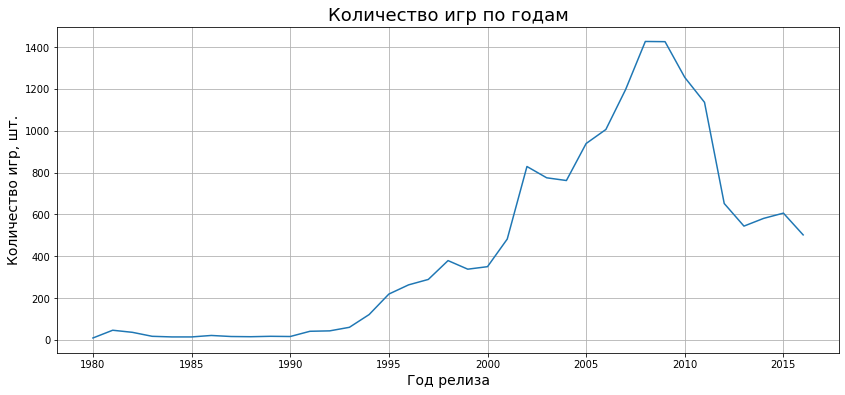

In [17]:
# построим график по столбцу year_of_release
data.groupby('year_of_release').count()['name'].plot(
    figsize=(14,6), # размер графика
    grid=True, # сетка
)
plt.xlabel("Год релиза", fontsize=14)
plt.ylabel("Количество игр, шт.", fontsize=14)
plt.title("Количество игр по годам", fontsize=18)
plt.show()

Изучив данные столбца `year_of_release` можно сказать, что:
- в датафрейме представлены игры, которые выпускались с 1980 по 2016 год;
- половина игр была выпущена в промежутке с 2003 по 2010 год;
- есть два ярковыраженных пика по количеству игр (2002 и 2008 год);
- в 2002 году игр выпустилось почти в два раза больше чем в предыдущем;
- в 2012 году игр вышло почти в два раза меньше, чем в предыдущем.

### Анализ игр по платформам

Создадим датафрейм `data_sales` в котором сведем данные по продажам игр, выпущенных в разные годы на различных платформах:

In [18]:
# создадим сводную таблицу, где посчитаем суммарные продажи по платформам по годам
data_sales = (data
              .pivot_table(
                  index='platform', 
                  columns='year_of_release',
                  values='world_sales', 
                  aggfunc='sum')
              ).replace(0, np.nan)
data_sales.head(10)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим на примерный срок жизни всех платформ (сколько лет выпускались игры на платформу):

In [19]:
data_sales.T.count().sort_values(ascending=False)

platform
PC      26
GB      13
NES     12
X360    12
PSP     12
PS2     12
Wii     11
DS      11
PS3     11
2600    10
SNES    10
PS      10
XB       9
GBA      8
DC       7
GC       7
N64      7
SAT      6
3DS      6
PSV      6
WiiU     5
GEN      5
NG       4
PS4      4
XOne     4
WS       3
SCD      2
3DO      2
TG16     1
GG       1
PCFX     1
dtype: int64

Построим теппловую карту по количеству продаж игр, выпущенных в разные годы, по платформам:

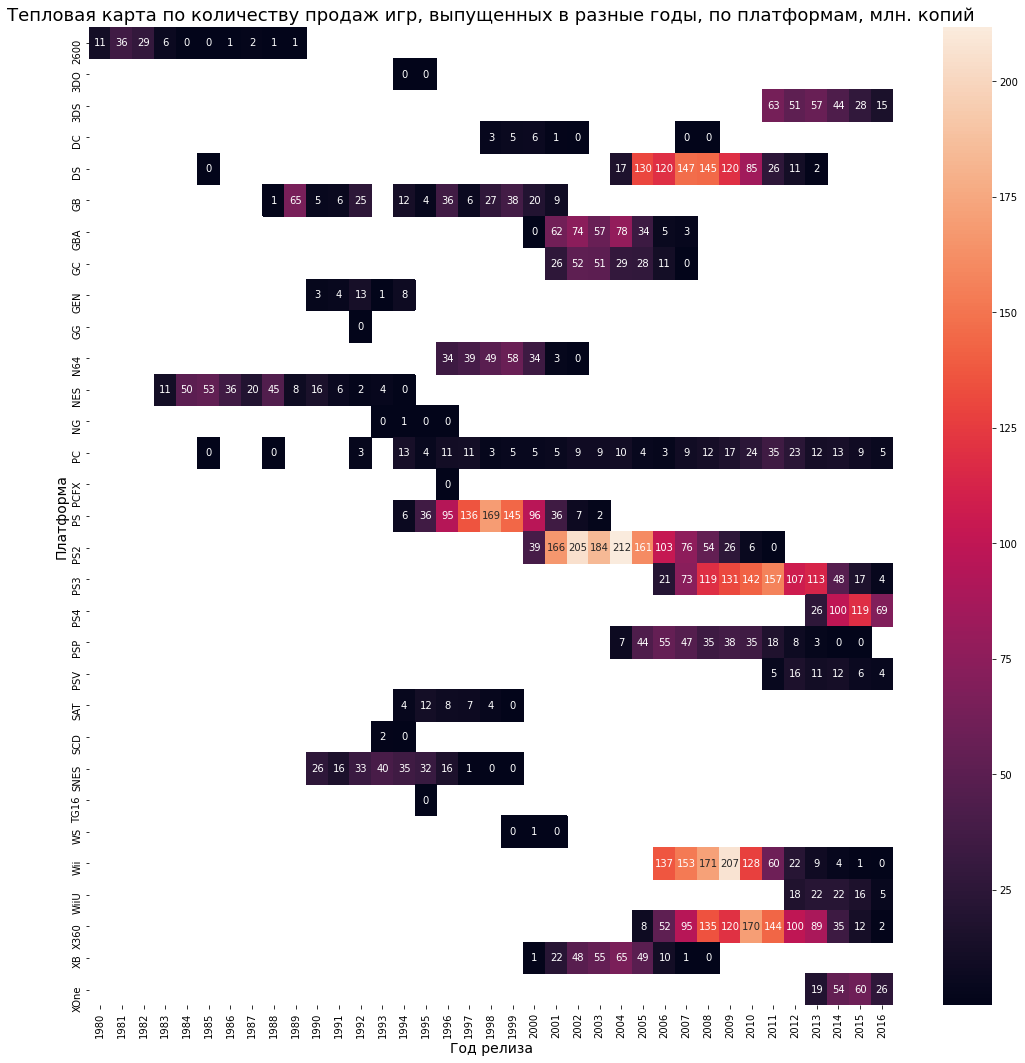

In [20]:
plt.subplots(figsize=(18, 18))
sns.heatmap(data_sales, annot=True, fmt=".0f")
plt.xlabel("Год релиза", fontsize=14)
plt.ylabel("Платформа", fontsize=14)
plt.title('Тепловая карта по количеству продаж игр, выпущенных в разные годы, по платформам, млн. копий', fontsize=18)
plt.show()

Теперь посмотрим на графике, как менялось количество продаж игр разных годов выпуска по ТОП-10 платформам по количеству  продаж за все время:

,platform,world_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


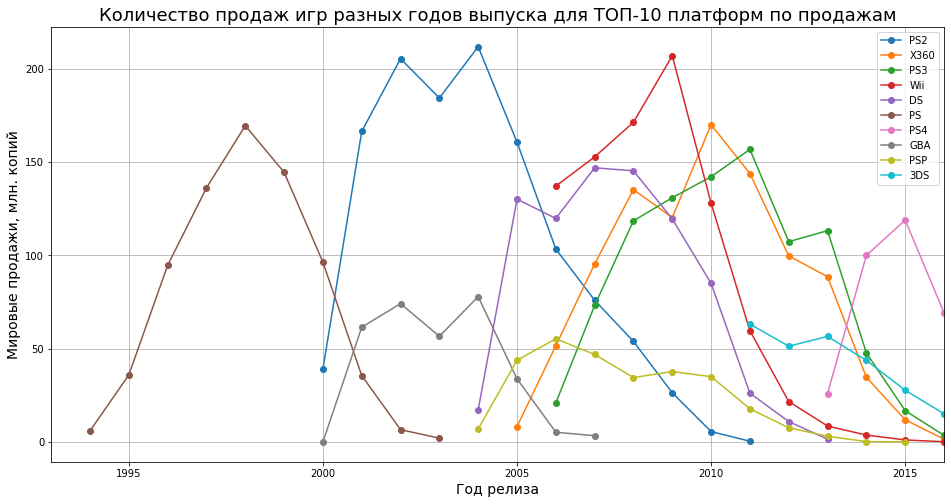

In [21]:
# создадим датафрейм top_sales_all_years, где посчитаем прожади всех игра за все время по платформам
top_sales_all_years = data.groupby('platform')['world_sales'].sum().sort_values(ascending=False).reset_index()
# выведем ТОП-10 платформ по продажам
display(top_sales_all_years.head(10))
# с помощью цикла переберем топ-10 платформ по продажам и постром график количества продаж
for i in top_sales_all_years['platform'].iloc[:10]:
    data_sales.T[i].plot(
        style='o-', # стиль графика
        figsize=(16,8), # размер графика
        label=i, # подпись данных
        legend=True, # легенда включена
        grid=True, # сетка
        xlim=(1993, 2016), # ограничение по оси Х
        )
    plt.xlabel("Год релиза", fontsize=14)
    plt.ylabel("Мировые продажи, млн. копий", fontsize=14)
    plt.title("Количество продаж игр разных годов выпуска для ТОП-10 платформ по продажам", fontsize=18)

На графике и тепловой карте видно:
- как платформы сменяли друг друга:
    - после выхода PS2 игры на PS выпускались еще 5 лет, 
    - после выхода PS3 игры на PS2 выпускались еще 6 лет;
    - после выхода X360 игры на XB выпускались еще 3 года;
- что количество продаж игр выпущенных после выхода платформ нового поколения падает;
- из топ-10 платформ по количеству проданных игр к 2016 году выпускаются и продаются в большом количестве игры только на PS4;
- в основном игры на разные платформы выпускают в промежутке от 1 до 13 лет, за исключение `PC`;
- игры на PC хоть и не так велики по продажам, но с 1992 года как минимум 3 млн. копий игр продается.

Для анализа опредилим актуальный период: последние 3 года и посмотрим на какие платформы вообще выпусками игры за это время:

In [22]:
# уберем данные за неактуальный период и обновим датафреймы
data_actual = data[data.year_of_release >= 2014].reset_index(drop=True)
data_sales_actual = ((data_actual
              .pivot_table(
                  index='platform', 
                  columns='year_of_release',
                  values='world_sales', 
                  aggfunc='sum')
              )
              .replace(0, np.nan)
              .reset_index()
              .dropna(subset=[2014])
              .set_index('platform')
                    )
# посчитаем сумму продаж по играм выпущенным за последние 3 года
top_sales_in_3_years = (data_actual
                        .pivot_table(
                            index='platform',
                            values='world_sales',
                            aggfunc='sum'
                        )
                        .sort_values(by='world_sales', ascending=False)
                        .reset_index()
                        )
top_sales_in_3_years

,platform,world_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


За последние 3 года игры выпускались всего на 10 платформах, посмотрим на продажи новых игр, вышедших за последние 3 года:

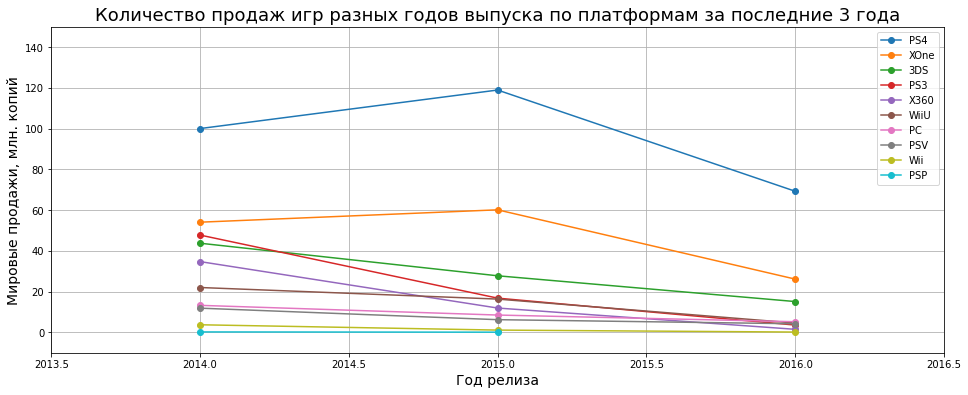

In [23]:
# с помощью цикла переберем все платформы с продажами за последние 3 года и постром график количества продаж
for i in top_sales_in_3_years['platform'].iloc[:10]:
    data_sales_actual.T[i].plot(
        style='o-', # стиль графика
        figsize=(16,6), # размер графика
        label=i, # подпись данных
        legend=True, # легенда включена
        grid=True, # сетка
        ylim=(-10, 150),
        xlim=(2013.5, 2016.5), # ограничение по оси Х
        )
plt.xlabel("Год релиза", fontsize=14)
plt.ylabel("Мировые продажи, млн. копий", fontsize=14)
plt.title("Количество продаж игр разных годов выпуска по платформам за последние 3 года", fontsize=18)
plt.show()

Продажи новых игр не очень, роста по количеству продаж новых игр нет.

Посмотрим на тепловую карту среднего количества продаж на одну игру за последние 3 года по платформам:

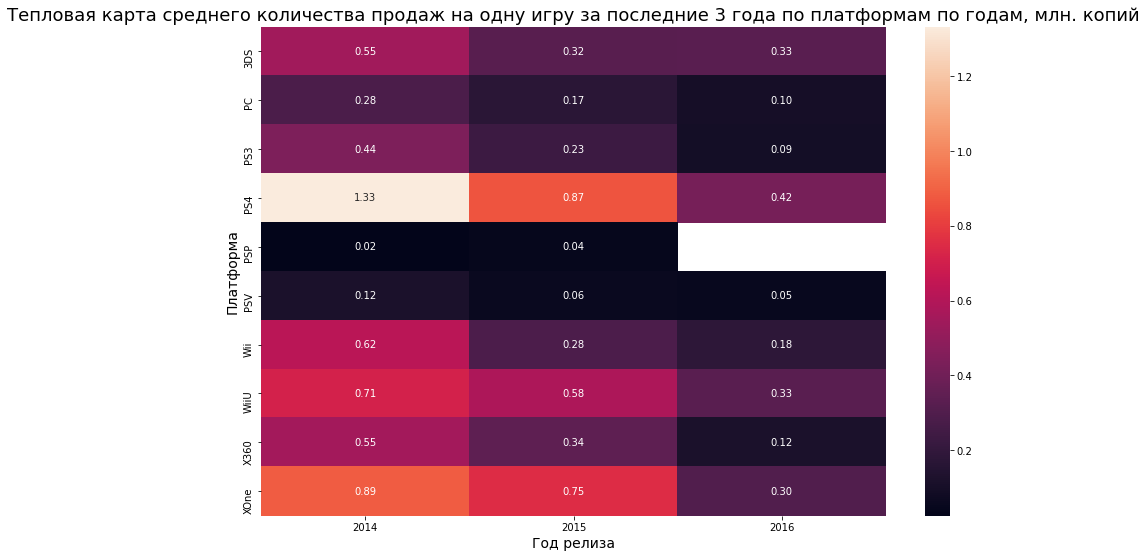

In [24]:
plt.subplots(figsize=(14, 9))
sns.heatmap(data_actual
            .pivot_table(
                index='platform', 
                columns='year_of_release', 
                values='world_sales'), 
            annot=True, 
            fmt=".2f"
           )
plt.xlabel("Год релиза", fontsize=14)
plt.ylabel("Платформа", fontsize=14)
plt.title("Тепловая карта среднего количества продаж на одну игру за последние 3 года по платформам по годам, млн. копий", fontsize=18)
plt.show()

На основе тепловой карты можно сделать вывод, что среднее количество продаж на новые игры по всем платформам в последние 3 года только падают.

На основе графиков и тепловых карт можно предполагать, что в 2017 году потенциально прибыльными будут те же платформы, что и были самыми прибыльными в 2014-2016 годах, но скорее всего с меньшим количеством продаж:
- PS4;
- Xone;
- 3DS;
- WiiU.

Посмотрим на график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

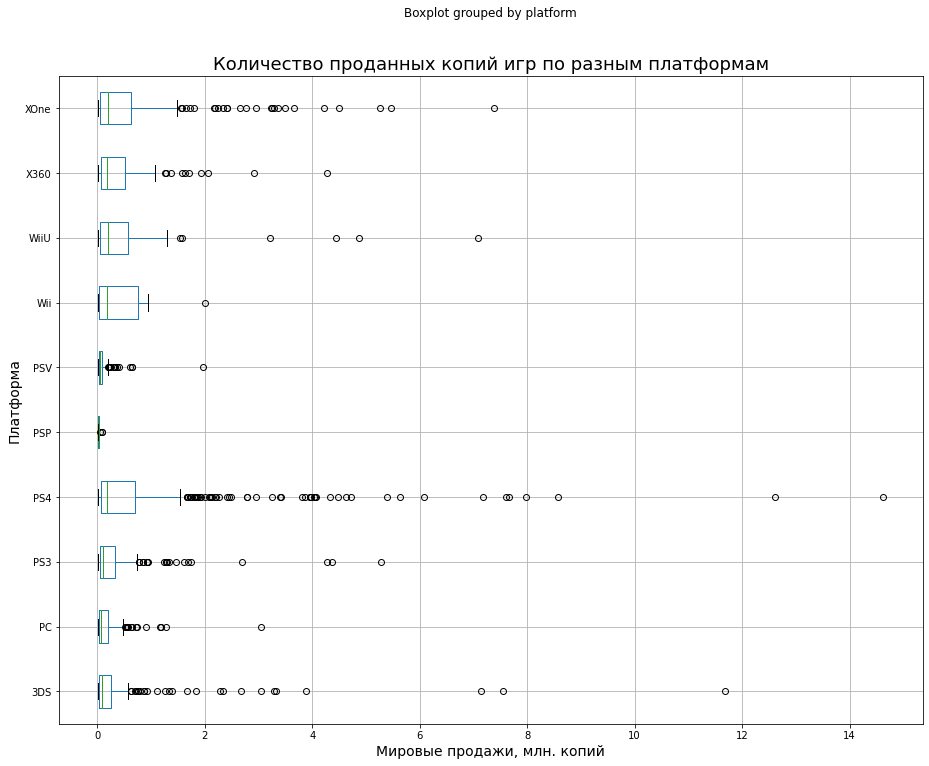

In [25]:
data_actual.boxplot(
    column='world_sales', 
    by='platform', 
    vert=0, 
    figsize=(15, 12)
)
plt.xlabel("Мировые продажи, млн. копий", fontsize=14)
plt.ylabel("Платформа", fontsize=14)
plt.title("Количество проданных копий игр по разным платформам", fontsize=18)
plt.show()

Есть выбросы, срежем продажи свыше 2 млн. копий и постром график еще раз:

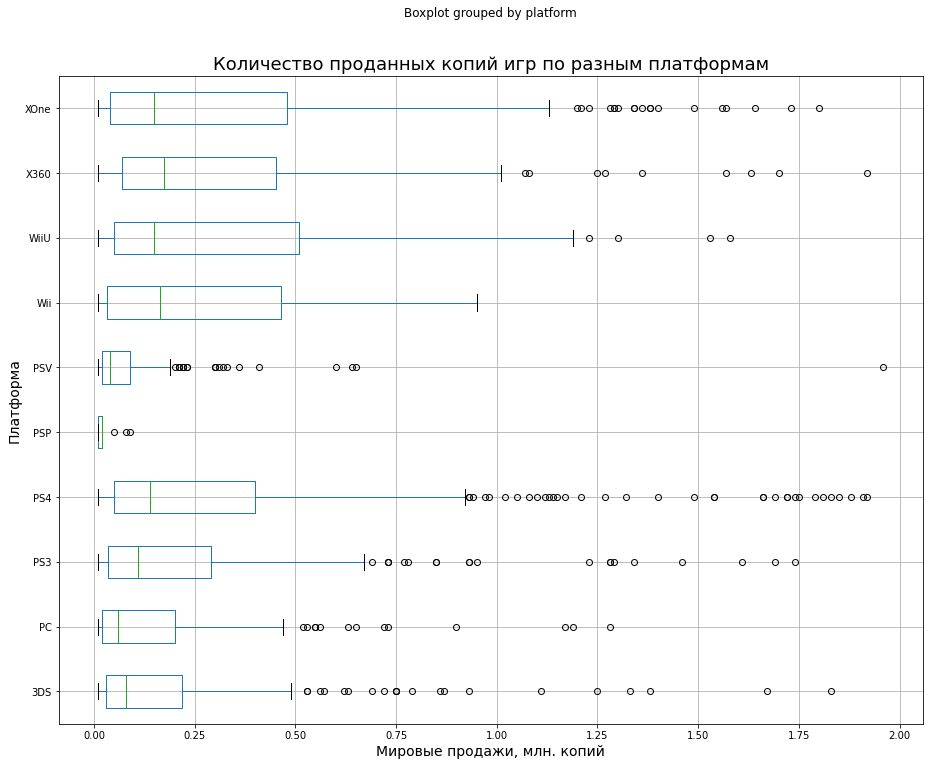

In [26]:
data_actual.query('world_sales < 2').boxplot(
    column='world_sales', 
    by='platform', 
    vert=0, 
    figsize=(15, 12)
)
plt.xlabel("Мировые продажи, млн. копий", fontsize=14)
plt.ylabel("Платформа", fontsize=14)
plt.title("Количество проданных копий игр по разным платформам", fontsize=18)
plt.show()

По графикам видно, что:
- на 4 платформах были очень сильно **"стрельнувшие"** игры, их продажи были свыше 6 млн. копий (`X360`, `WiiU`, `PS4`, `3DS`);
- в основном количество проданных копий без выбросов находится в пределах 1,5 млн. копий.

### Влияние отзывов пользователей и критиков на продажи

Посчитаем корреляцию между отзывами и продажами для платформ, на которые выпускались игры за последние 3 года:

In [27]:
# создадим списки для будующего датафрейма с коэффициентами корреляции Пирсона
name_platform = top_sales_in_3_years['platform'].iloc[:10].tolist()
corr_critic_score = []
corr_user_score = []
# переберем все платформы на которые выходили игры за последние 3 года
for i in name_platform:
    # посчитаем коэффициент корреляции Пирсона предварительно срезав выбросы по продажам свыше 95 квантиля
    corr_1 = (data_actual[data_actual['platform'] == i]['world_sales']
              .corr(data_actual[data_actual['platform'] == i]['critic_score']))
    # добавим в список значение корреляции для платформы i от оценки критиков
    corr_critic_score.append(corr_1)
    # посчитаем коэффициент корреляции Пирсона предварительно срезав выбросы по продажам свыше 95 квантиля
    corr_2 = (data_actual[data_actual['platform'] == i]['world_sales']
              .corr(data_actual[data_actual['platform'] == i]['user_score']))
    # добавим в список значение корреляции для платформы i от оценки пользователей
    corr_user_score.append(corr_2)
# создадим датафрейм со значения коэффициента корреляции Пирсона для мировых продаж от отценки по платформам    
data_corr = pd.DataFrame(index=name_platform, data={'corr_critic_score': corr_critic_score, 'corr_user_score': corr_user_score})
data_corr

,corr_critic_score,corr_user_score
PS4,0.402661,-0.040132
XOne,0.428677,-0.070384
3DS,0.314117,0.215193
PS3,0.446575,-0.166761
X360,0.525723,-0.138445
WiiU,0.370201,0.407926
PC,0.174634,-0.071597
PSV,0.042665,-0.168455
Wii,NaN,1.000000
PSP,NaN,NaN


Построим тепловую карту для `data_corr`:

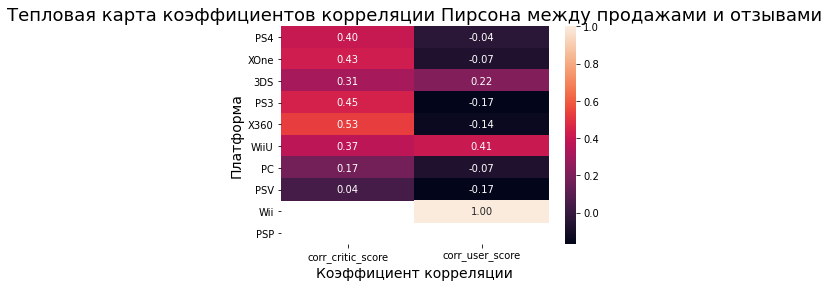

In [28]:
sns.heatmap(data_corr, annot=True, fmt=".2f")
plt.xlabel("Коэффициент корреляции", fontsize=14)
plt.ylabel("Платформа", fontsize=14)
plt.title("Тепловая карта коэффициентов корреляции Пирсона мeжду продажами и отзывами", fontsize=18)
plt.show()

По тепловой карте видно, что:
- корреляция между продажами и оценками критиков выше чем корреляция между продажами и оценками пользователей;
- по трем платформам `PS3`, `X360` и `XOne` наблюдается средняя корреляци (коэффициент больше 0,43) и по ним с натяжкой можно утверждать, что зависимость между продажами и оценками критиков есть, а у остальных она меньше и по ним нельзя утверждать, что есть какая-то сильная зависимость между продажами и оценками критиков;
- у платформы `WiiU` самая высокая корреляция по продажам и оценкам пользователей (0,41) у остальных платформ и того ниже, по ним точно нет зависимости прождаж от оценки пользователей;
- для платформы `PSP` вообще не нашлись данные для определения корреляции.

У платформы `Wii` коэффициент корреляции Пирсона равен 1, скорее всего там очень мало значений, проверим их:

In [29]:
data_actual.query('platform == "Wii" & user_score > 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
80,Just Dance 2015,Wii,2014,Misc,0.99,0.85,0.0,0.17,NaN,8.4,E10+,2.01
300,FIFA 15,Wii,2014,Sports,0.15,0.37,0.0,0.04,NaN,4.3,E,0.56


Всего две строки, это не очень показательно.

Построим диаграммы рассеяния для платформ и оценок с самыми высокими корреляциями:

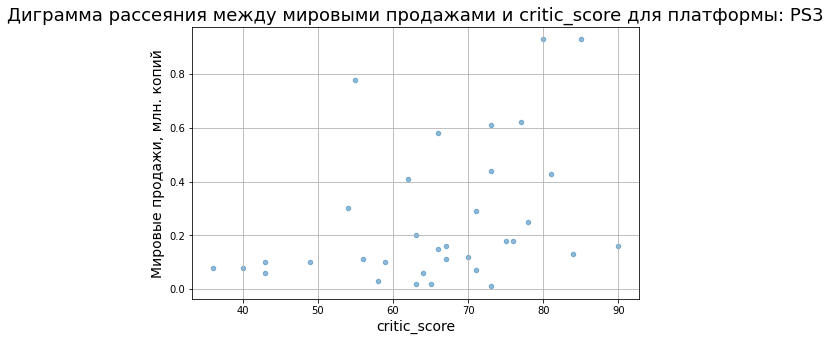

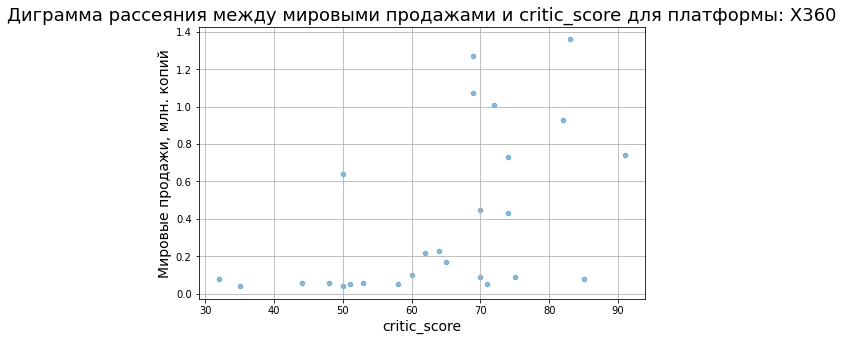

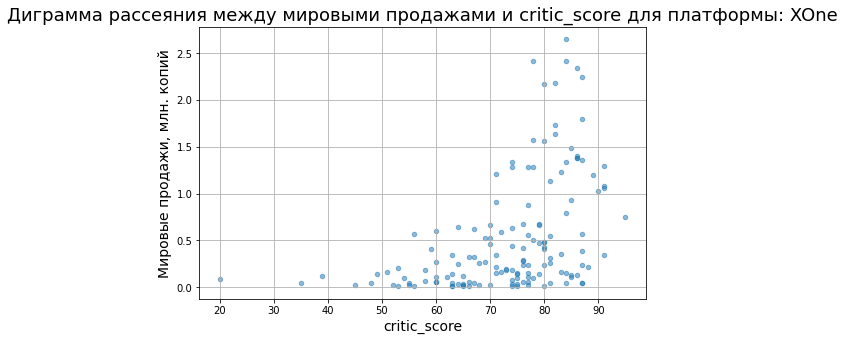

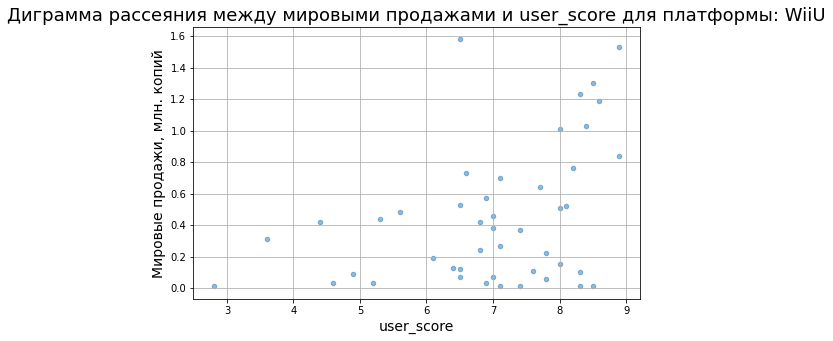

In [30]:
# создадим функцию для построения диаграмм рассеяния
def corr_plot (data, platform, score):
    (data[data['platform'] == platform].query('world_sales < world_sales.quantile(0.95)')
         .plot(
             kind='scatter', # тип графика
             x=score, # значения для оси Х
             y='world_sales', # значения для оси У
             figsize=(8, 5), # размер графика
             grid=True, # сетка
             alpha=0.5, # прозрачность точек 0,5
            )
    )
    plt.xlabel(score, fontsize=14)
    plt.ylabel("Мировые продажи, млн. копий", fontsize=14)
    plt.title(f'Диграмма рассеяния между мировыми продажами и {score} для платформы: {platform}', fontsize=18)
  
corr_plot(data_actual, 'PS3', 'critic_score')
corr_plot(data_actual, 'X360', 'critic_score')
corr_plot(data_actual, 'XOne', 'critic_score')
corr_plot(data_actual, 'WiiU', 'user_score')

По диграмма видно, что зависимость небольшая, но все же есть: чем выше оценки, тем выше продажи.

### Анализ игр по жанрам

Посмотрим на распределение игр по жанрам:

,genre,count_games,world_sales
0,Action,619,199.36
1,Role-Playing,221,101.44
2,Adventure,185,17.55
3,Sports,161,109.48
4,Shooter,128,170.94
5,Misc,113,37.55
6,Racing,69,27.52
7,Fighting,60,28.22
8,Simulation,44,13.13
9,Platform,38,18.09


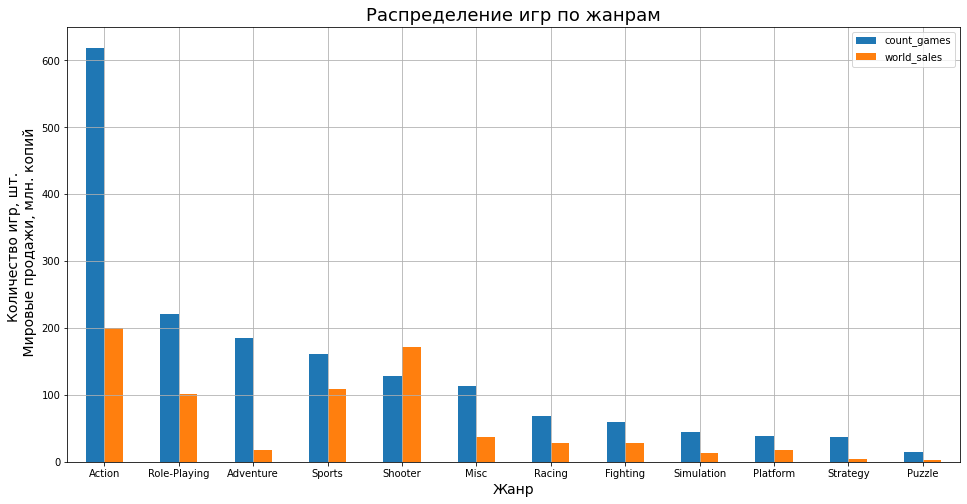

In [31]:
# сведем данные по продажам по жанрам
data_genre = (data_actual.pivot_table(index='genre', 
                               values='world_sales', 
                               aggfunc=('count', 'sum')
                              )
              # переименуем колонки
              .rename(columns = {'count':'count_games', 'sum':'world_sales'})
              # отсортируем по количеству игр по жанрам
              .sort_values(by='count_games', ascending=False)
              .reset_index()
             )
display(data_genre)
# построим распределение тгр по жанрам
data_genre.plot(kind='bar', # вид графика
                x='genre', # значения оси Х
                figsize=(16, 8), # размер
                grid=True, # сетка
                rot=0, # поворот подписей оси Х
               )
plt.xlabel("Жанр", fontsize=14)
plt.ylabel(f'Количество игр, шт. \n Мировые продажи, млн. копий', fontsize=14)
plt.title("Распределение игр по жанрам", fontsize=18)
plt.show()

По таблице и графику видно, что:
- топ-3 жанра по количеству игр это: `Action`, `Role-Playing` и `Adventure`, но по количеству продаж `Adventure` занимает лишь 9 место;
- топ-3 жанра по продажам это: `Action`, `Shooter` и `Sports`;
- самый прибыльный жанр по соотношению количества игр к количеству продаж это `Shooter`;
- самые не прибыльные жанры это: `Puzzle`, `Simulation` и `Strategy`.

## Портрет пользователей разных регионов

Посмотрим на топ-5 платформ по продажам в разных регионах:

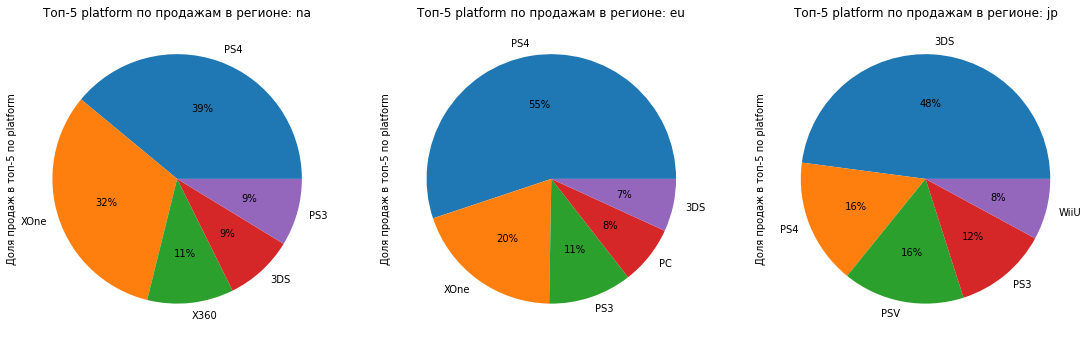

In [32]:
# создадим функцию для построения распределения продаж в топ-5
def plot_pie (data, parametr, region, number):
    (data.pivot_table(index=parametr, 
                      values= region + '_sales', 
                      aggfunc='sum')
     .sort_values(by= region + '_sales', ascending=False)
     .iloc[:5]
     .plot(kind='pie', # вид
           y= region + '_sales', # данные для графика
           autopct='%1.0f%%', # подписи в %
           legend=False, # убираем легенду
           ax=axes[int(number)],
           ylabel=(f'Доля продаж в топ-5 по {parametr}'),
           title=(f'Топ-5 {parametr} по продажам в регионе: {region}')
           )
    )    
# построим распределения продаж в топ-5 по платформам
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(19, 7))
plot_pie(data_actual, 'platform', 'na', 0)
plot_pie(data_actual, 'platform', 'eu', 1)
plot_pie(data_actual, 'platform', 'jp', 2)

По диаграммам видно, что:
- в Америке самая популярная платформа - `PS4` (39%), затем идет `XOne` с долей 32%, и замыкают топ-5 `X360`, `3DS` и `PS3` с долей 11% и по 9% соответственно;
- в Европе самая популярная платформа тоже `PS4`, но с большей долей (55%), и затем также идет `XOne` с долей 20%, и менее популярные так же `PS3` и `3DS` (11% и 7% соответственно), но вместо `X360` европейцы предпочитали `PC` с долей 8%;
- в Японии лидирует по продажам платформа замыкающая топ-5 в Европпе и Америке - это `3DS` с долей 48%, затем идет `PS4` с долей 16%, на третем месте `PSV` с долей 16%, и замыкают топ-5 `PS3` и `WiiU` (12% и 8% соответственно).

Посмотрим на топ-5 жанров по продажам в разных регионах:

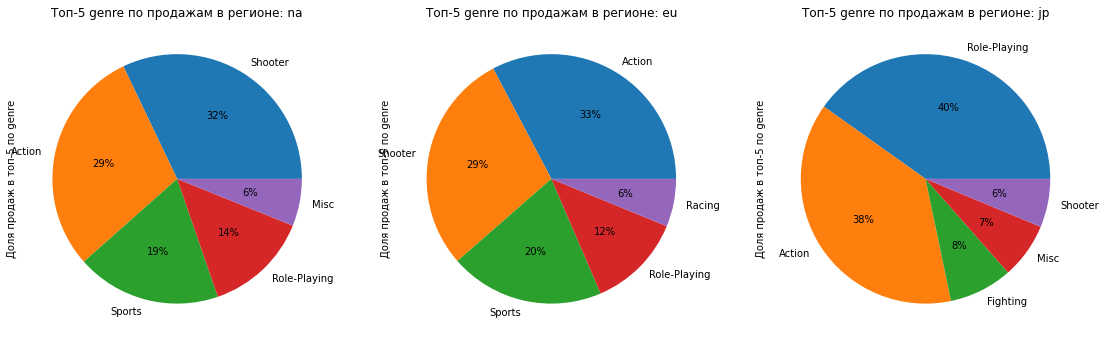

In [33]:
# построим распределения продаж в топ-5 по жанрам
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(19, 7))
plot_pie(data_actual, 'genre', 'na', 0)
plot_pie(data_actual, 'genre', 'eu', 1)
plot_pie(data_actual, 'genre', 'jp', 2)

По графикам видно, что:
- в Америке почти треть в ТОП-5 жанрах занимает игры в жанре `Shooter` (32%), затем идут игры жанра `Action` и `Sports` (29% и 19% соответственно), менее популярные в ТОП-5 игры в жанре `Role-Playing` и `Misc` (14% и 6% соответственно);
- в Европе ситуация похожая на Америку, но топ-2 у них в обратном порядке: `Action` (33%) и `Shooter` (29%) и вместо жанра `Misc` европейцы выбирают игры в жанре `Racing`;
- в Японии очень большую долю в ТОП-5 игр по жанрам занимаю игры с жанре `Role-Playing` (40%) и `Action` (38%), затем идут `Fighting`, `Misc` и `Shooter`.

Посмотрим влияет ли рейтинг ESRB на продажи в отдельных регионах, сведем данные по количеству игр и суммам продаж по рейтингу:

In [34]:
# заполним пропуски в rating значениями no rating
data_actual['rating'] = data_actual['rating'].fillna('no rating')
# сводная таблица
data_actual.pivot_table(index='rating', 
                 values=['world_sales', 'na_sales', 'eu_sales', 'jp_sales'], 
                 aggfunc={'world_sales': 'count', 'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}
                ).rename(columns={'world_sales': 'count_games'})  

,eu_sales,jp_sales,na_sales,count_games
rating,,,,
E,58.06,8.94,50.74,219
E10+,26.16,4.46,33.23,185
M,93.44,8.01,96.42,265
T,34.07,14.78,38.95,271
no rating,58.95,56.90,64.72,749


По таблице видно, что:
- выпкускались игры в основном только с рейтингами:
    - `Е` - для всех;
    - `Е10+` - для всех от 10 лет и старше;
    - `M` - для взрослых, материалы игры не подходят для лиц младше 17 лет;
    - `T` - для подростков, игра подходит для лиц от 13 лет.
    
Посмотрим на соотношение продаж в этих группах внутри регионов, учтем еще игры без рейтинга:

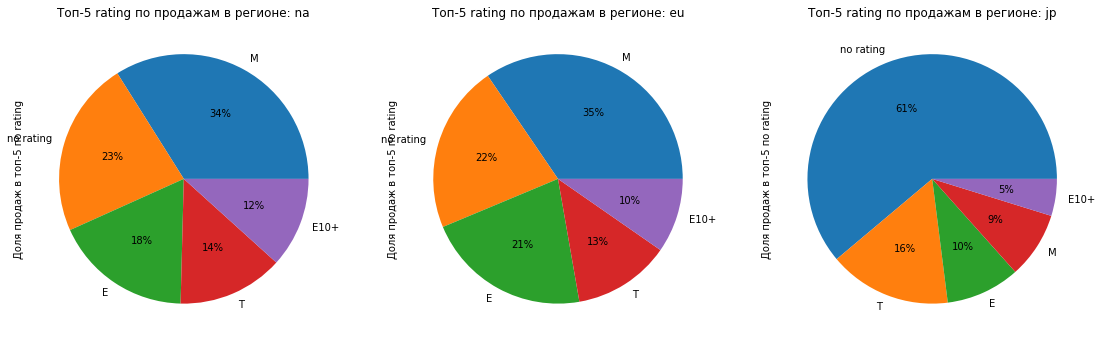

In [35]:
# построим распределения продаж в топ-5 по rating
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(19, 7))
plot_pie(data_actual, 'rating', 'na', 0)
plot_pie(data_actual, 'rating', 'eu', 1)
plot_pie(data_actual, 'rating', 'jp', 2)

По графикам видно, что:
- в Америке и Европпе порядок и соотношения примерно одинаковые: всех больше продаж игр с рейтингом `M` (34% и 35% соответственно), затем идут игры без рейтинга (23% и 22% соответственно), потом идут игры с рейтингом `E` (18% и 21% соответственно) и замыкают топ игры с рейтингом `T` и `E10+` (от 14% до 10%);
- в Японии немного другое соотношение: Самая большая доля у игр без рейтинга (61%), затем идет игры с рейтингом `T` c долей 16% и дальше идут `E`, `M` и `E10+` с долей 10%, 9% и 5% соответственно.

## Проверка гипотез

### Гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Необходимо проверить гипотезу: средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые. 

Сформулируем нулевую и альтернативную гипотезу:

- **Нулевая гипотеза:** средние пользовательские рейтинги платформ `Xbox One` и `PC` равны.

- **Альтернативная гипотеза:** средние пользовательские рейтинги платформ `Xbox One` и `PC` разные.

Чтобы проверить эту двусторонюю гипотезу, необходимо сравнить среднее двух генеральных совокупностей, поэтому воспользуемся методом `.ttest_ind` (полагаем, что дисперсии двух генеральных совокупностей не равны):

In [36]:
# задаём уровень значимости 1%
alpha = 0.01 
# проводим ttest для двух выборок, в качестве альтернативной используем двусторонюю гипотезу
results = st.ttest_ind(data_actual.query('platform == "XOne"')['user_score'],
                       data_actual.query('platform == "PC"')['user_score'],
                       equal_var=False,
                       nan_policy='omit'
                      )
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.11601398086668943
Нет оснований отвергнуть нулевую гипотезу


Значение p-value больше уровня значимости в 1%, поэтому нет оснований отвергнуть нулевую гипотезу.

**Первая гипотеза подтвердилась:** можно утверждать, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.

### Гипотеза 2: средние пользовательские рейтинги жанров Action и Sports разные

Необходимо проверить гипотезу: средние пользовательские рейтинги жанров `Action` и `Sports` разные. 

Сформулируем нулевую и альтернативную гипотезу:

- **Нулевая гипотеза:** средние пользовательские рейтинги жанров `Action` и `Sports` равны.

- **Альтернативная гипотеза:** средние пользовательские рейтинги жанров `Action` и `Sports` разные.

Чтобы проверить эту двусторонюю гипотезу, необходимо сравнить среднее двух генеральных совокупностей, поэтому воспользуемся методом `.ttest_ind` (полагаем, что дисперсии двух генеральных совокупностей не равны):

In [37]:
# задаём уровень значимости 1%
alpha = 0.01 
# проводим ttest для двух выборок, в качестве альтернативной используем двусторонюю гипотезу
results = st.ttest_ind(data_actual.query('genre == "Action"')['user_score'],
                       data_actual.query('genre == "Sports"')['user_score'],
                       equal_var=False,
                       nan_policy='omit'
                      )
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.182555038264477e-14
Отвергаем нулевую гипотезу


Значение p-value значительно меньше уровня значимости в 1%, поэтому отвергаем нулевую гипотезу.

**Вторая гипотеза подтвердилась:** есть основания утверждать, что средние пользовательские рейтинги жанров `Action` и `Sports` разные.

## Общий вывод

В проекте "Исследование данных о продажах игр" проделана работа по изучению данных и их предобработке, а именно были:
- приведены названия столбцов в удобный вид;
- изменены типы данных;
- убраны строки с пропусками в `year_of release`, `name` и `genre`;
- убран один неявный дубликат;
- добавлен столбец с суммарными продажами по миру.

Затем данные были проанализированны и выявлено, что:
- анализ распределения количества игр по годам показал, что:
    - в датафрейме представлены игры, которые выпускались с 1980 по 2016 год;
    - есть два ярковыраженных пика по количеству игр (2002 и 2008 год);
- анализ игр по платформам показал:
    - что количество продаж игр выпущенных после выхода платформ нового поколения падает (в течении 3-6 лет после выпуска новой платформы);
    - из топ-10 платформ по количеству проданных игр к 2016 году выпускаются и продаются в большом количестве игры только на PS4;
    - в основном игры на разные платформы выпускают в промежутке от 1 до 13 лет;
    - роста по количеству продаж новых игр к 2016 году нет.
    - в 2017 году потенциально прибыльными будут те же платформы, что и были самыми прибыльными в 2015-2016 годах, но скорее всего с меньшим количеством продаж:
        - `PS4`;
        - `XOne`;
        - `3DS`;
        - `WiiU`;
    - на 4 платформах были очень сильно **"стрельнувшие"** игры, их продажи были свыше 6 млн. копий (`X360`, `WiiU`, `PS4`, `3DS`);
    - в основном количество проданных копий без выбросов находится в пределах 1,5 млн. копий;
- анализ по платформам показал:
    - топ-3 жанра по количеству игр это: `Action`, `Role-Playing` и `Adventure`;
    - топ-3 жанра по продажам это: `Action`, `Shooter` и `Sports`;
    - самый прибыльный жанр по соотношению количества игр к количеству продаж это `Shooter`;
    - самые не прибыльные жанры это: `Puzzle`, `Simulation` и `Strategy`;
- влияние отзывов пользователей и критиков на продажи есть, но не на всех платформах:
    - корреляция между продажами и оценками критиков выше чем корреляция между продажами и оценками пользователей;
    - по трем платформам `PS3`, `X360` и `XOne` наблюдается средняя корреляция (коэффициент больше 0,43);
    - у платформы `WiiU` самая высокая корреляция по продажам и оценкам пользователей (0,41).

Затем был составлен портрет пользователей разных регионов и выявлено, что:
- есть различия по предпочитаемым платформам:
    - в Америке и в Европпе выбирали в основном одни и теже платформы в примерно одних и тех же пропорциях (только в Америке предпочли платформу `X360` вместо `PC`):
        - `PS4`;
        - `XOne`;
        - `PS3`;
        - `3DS`;
    - а вот в Японии топ-5 выглядит по другому, там в фаворе совсем другие платформы:
        - `3DS`;
        - `PS4`;
        - `PSV`;
        - `PS3`;
        - `WiiU`;
- есть различия по предпочитаемым жанрам:
    - как и по платформам пользователи в Америке и Европпе похожи, только в Америке предпочитают игры жанра `Misc` играм в жанре `Racing`:
        - `Action`;
        - `Sports`;
        - `Shooter`;
        - `Role-Playing`;
    - в Японии очень большую долю в ТОП-5 игр по жанрам занимаю игры с жанре `Role-Playing` (40%) и `Action` (38%), затем идут `Fighting`, `Misc` и `Shooter`;
- есть различия по продажам игр с различным ретингом:
    - в Америке и Европпе порядок и соотношения примерно одинаковые
    - судя по соотношению продаж по рейтингу в Японии по всей видимости покупают игры местного производства, сделанные для японцев без рейтинга ESRB.

Было проверено две гипотезы, которые подтвердились:
- средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые;
- средние пользовательские рейтинги жанров `Action` и `Sports` разные.

Рекомендации отделу маркетинга:
- для американского и европейского рынка нужно делать ставку на платформы `PS4` и `XOne` и на игры в жанре `Sports` и `Shooter`, у них самое лучшее отношение количества игр к продажам;
- для японском рынке самыми попуярными будут игры на `3DS` и `PS4` в жанре `Role-Playing` и `Action`.